Initial Data:
                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


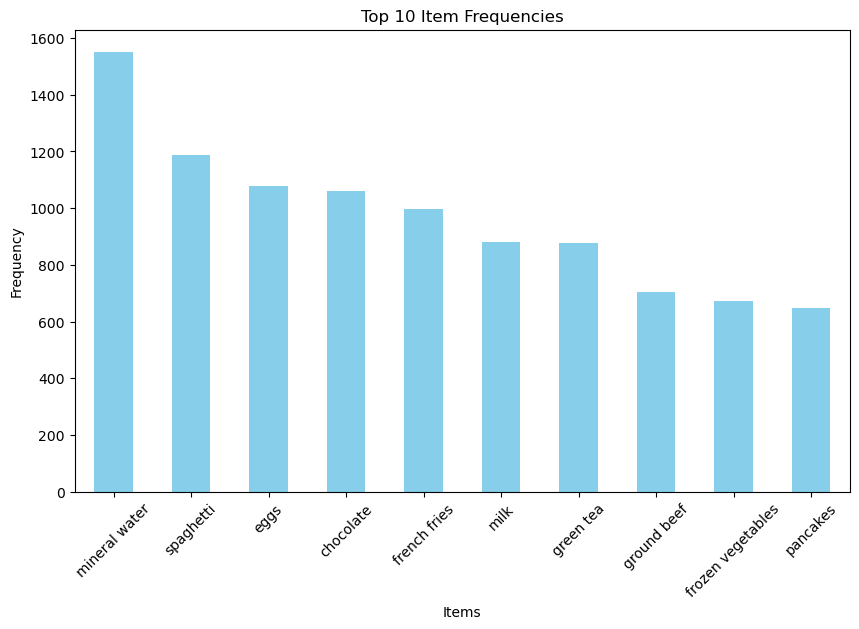

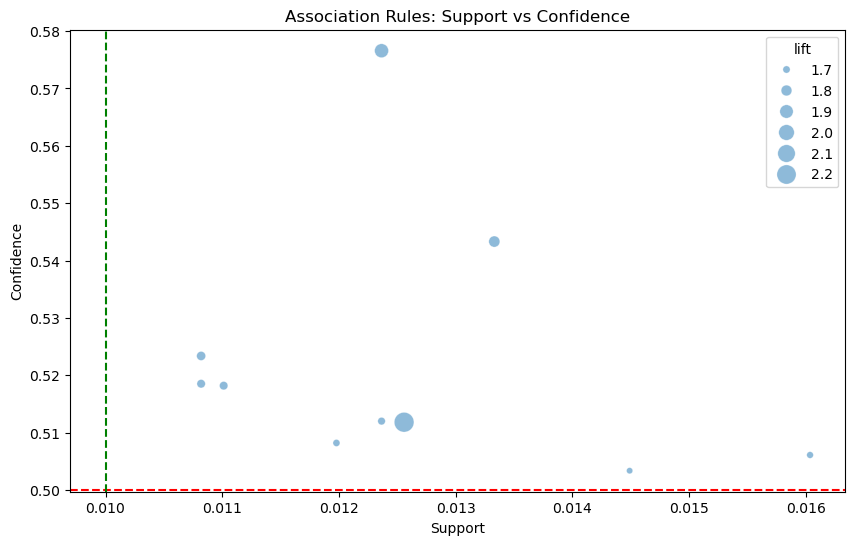

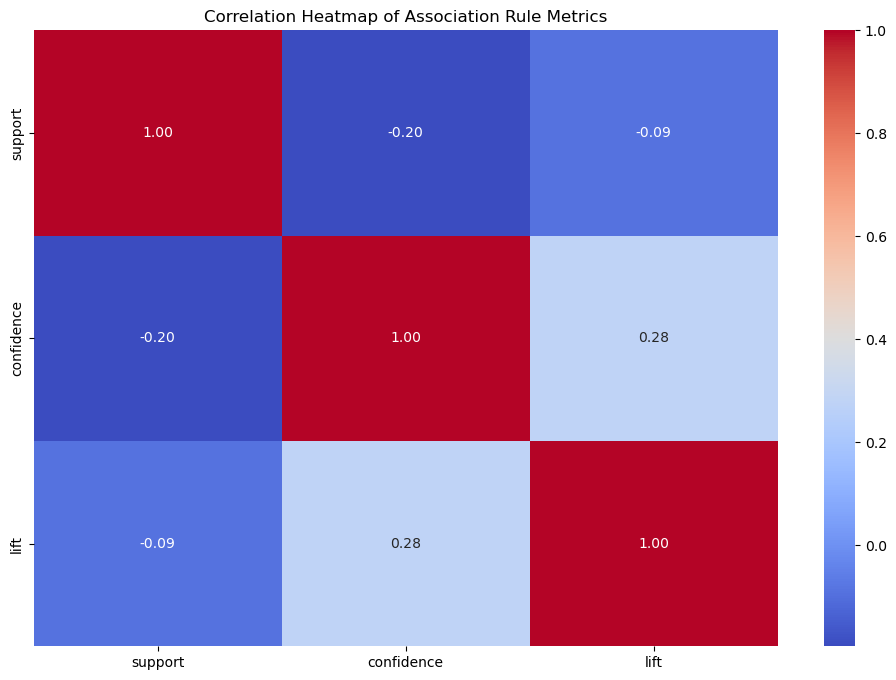

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"E:\assignments ds\DS Incomplete Assignments\Association Rules 4\Online retail.xlsx"
df = pd.read_excel(file_path, header=None)

# Inspect the DataFrame
print("Initial Data:")
print(df.head())

# Remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Split the items in the single column into a list of transactions
transactions = df[0].apply(lambda x: x.split(',')).tolist()

# One-hot encode the transaction data
encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

# Check item frequencies
item_frequencies = encoded_df.sum().sort_values(ascending=False)

# Visualization of Item Frequencies
plt.figure(figsize=(10, 6))
item_frequencies.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Apply Apriori Algorithm
frequent_itemsets = apriori(encoded_df, min_support=0.001, use_colnames=True)

# Generate Association Rules
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    # Filter rules based on support, confidence, and lift
    filtered_rules = rules[(rules['support'] >= 0.01) & (rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

    # Visualization of Association Rules
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_rules, x='support', y='confidence', size='lift', sizes=(20, 200), alpha=0.5)
    plt.title('Association Rules: Support vs Confidence')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.axhline(y=0.5, color='r', linestyle='--')  # Confidence threshold
    plt.axvline(x=0.01, color='g', linestyle='--')  # Support threshold
    plt.show()

    # Heatmap of the filtered rules
    plt.figure(figsize=(12, 8))
    sns.heatmap(filtered_rules[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Association Rule Metrics')
    plt.show()

    # Save the filtered rules to a CSV file
    filtered_rules.to_csv('filtered_association_rules.csv', index=False)
else:
    print("No frequent itemsets found.")

